In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Combined Data.csv')

In [ ]:
df.head()

Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety

In [ ]:
df.status.unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

1944

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51099 entries, 0 to 52840
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  51093 non-null  object
 1   status     51099 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51093 entries, 0 to 52840
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  51093 non-null  object
 1   status     51093 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df['statement']=df['statement'].str.lower()

In [ ]:
df.head()

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  all wrong, back off dear, forward doubt. stay ...  Anxiety
3  i've shifted my focus to something else but i'...  Anxiety
4  i'm restless and restless, it's been a month n...  Anxiety

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def remove_stopwords(text):
  new_text=[]

  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  return ' '.join(new_text)

In [ ]:
df['removed_stop']=df['statement'].apply(remove_stopwords)

In [ ]:
df.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  all wrong, back off dear, forward doubt. stay ...  Anxiety   
3  i've shifted my focus to something else but i'...  Anxiety   
4  i'm restless and restless, it's been a month n...  Anxiety   

                                        removed_stop  
0                                           oh  gosh  
1  trouble sleeping, confused mind, restless hear...  
2   wrong, back  dear, forward doubt. stay   rest...  
3  i've shifted  focus  something else  i'm still...  
4  i'm restless  restless,    month now, boy.    ...

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer =  WordNetLemmatizer()

In [ ]:
def lemmatize(text):
  new_text=[]
  for word in text.split():
    new_text.append(lemmatizer.lemmatize(word))
  return ' '.join(new_text)

In [ ]:
df['lemmatized']=df['removed_stop'].apply(lemmatize)

In [ ]:
df.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  all wrong, back off dear, forward doubt. stay ...  Anxiety   
3  i've shifted my focus to something else but i'...  Anxiety   
4  i'm restless and restless, it's been a month n...  Anxiety   

                                        removed_stop  \
0                                           oh  gosh   
1  trouble sleeping, confused mind, restless hear...   
2   wrong, back  dear, forward doubt. stay   rest...   
3  i've shifted  focus  something else  i'm still...   
4  i'm restless  restless,    month now, boy.    ...   

                                          lemmatized  
0                                            oh gosh  
1  trouble sleeping, confused mind, restless hear...  
2  wrong, back dear, forward doubt. stay restless...  
3  i've shifted focus something else i'm still wo...  
4       i'm restless restless, month now, boy. mean?

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status_encoded'] = le.fit_transform(df['status'])
df.head()


statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  all wrong, back off dear, forward doubt. stay ...  Anxiety   
3  i've shifted my focus to something else but i'...  Anxiety   
4  i'm restless and restless, it's been a month n...  Anxiety   

                                        removed_stop  \
0                                           oh  gosh   
1  trouble sleeping, confused mind, restless hear...   
2   wrong, back  dear, forward doubt. stay   rest...   
3  i've shifted  focus  something else  i'm still...   
4  i'm restless  restless,    month now, boy.    ...   

                                          lemmatized  status_encoded  
0                                            oh gosh               0  
1  trouble sleeping, confused mind, restless hear...               0  
2  wrong, back dear, forward doubt. stay restless...               0  
3  i've shifted focus something else i'm still wo...               0  
4       i'm restless restless, month now, boy. mean?               0

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{'Anxiety': 0, 'Bipolar': 1, 'Depression': 2, 'Normal': 3, 'Personality disorder': 4, 'Stress': 5, 'Suicidal': 6}


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer()

In [ ]:
lemmatized=list(df['lemmatized'])

In [ ]:
tokenizer.fit_on_texts(lemmatized)

In [ ]:
len(tokenizer.word_index)

61781

In [ ]:
sequences = tokenizer.texts_to_sequences(lemmatized)

In [ ]:
sequences

[[519, 4513],
 [788, 562, 878, 163, 1166, 199, 8100],
 [176, 33, 2129, 507, 955, 243, 1166, 1166, 175],
 [116, 6788, 624, 40, 93, 27, 37, 330],
 [27, 1166, 1166, 69, 79, 1119, 220],
 [49, 312, 696, 760, 1, 40, 176, 3179],
 [2, 154, 273, 118, 290, 54, 228, 5819],
 [74, 100, 760, 4, 517],
 [1272, 90, 126, 448, 1, 27, 1166, 3006],
 [27, 12, 330, 3, 179],
 [44, 1166, 49, 132, 8, 144, 4, 517, 1191, 176, 1242],
 [27, 878, 27, 32, 42, 413, 49, 7, 3, 109, 44, 2, 1166],
 [143,
  373,
  160,
  958,
  707,
  160,
  263,
  19,
  2,
  1166,
  1,
  90,
  358,
  37,
  178,
  561,
  2068,
  2068,
  2068],
 [359, 177],
 [143, 41, 22, 273, 306, 271, 439, 109],
 [49, 7, 297, 157, 27, 749, 760, 992, 18, 82, 6990],
 [145, 8, 144, 27, 330, 150, 1, 72],
 [28405, 1166, 1166],
 [572, 862, 15554, 425, 16, 777, 898, 23, 277, 559, 560, 8725],
 [229, 239, 270, 138, 2, 239, 6069, 696, 32, 1166, 1166, 1935],
 [116, 273, 81, 615, 5516, 81, 116, 53, 330, 81, 432],
 [2857, 447, 6460, 8, 562, 356, 3930, 176],
 [219, 109

In [ ]:
#find out sentences with token size >1000
too_long=[]
long_ind=[]
for i,s in enumerate(sequences):
  if len(s)>1000:
    too_long.append((s,i))
    long_ind.append(i)
len(too_long)

17

In [ ]:
sequences[0]

[519, 4513]

In [ ]:
for i in too_long:
  print(i[1],len(i[0]))

10745 2548
11448 1167
11492 1276
11547 1208
11742 1072
13203 3780
18121 1027
21299 1110
21740 1003
21761 1219
22146 1162
22466 1133
23718 1012
23743 1003
39386 1845
46232 2490
49919 2486


In [ ]:
long_ind

[10745,
 11448,
 11492,
 11547,
 11742,
 13203,
 18121,
 21299,
 21740,
 21761,
 22146,
 22466,
 23718,
 23743,
 39386,
 46232,
 49919]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

statement   status  \
0                                             oh my gosh  Anxiety   
1      trouble sleeping, confused mind, restless hear...  Anxiety   
2      all wrong, back off dear, forward doubt. stay ...  Anxiety   
3      i've shifted my focus to something else but i'...  Anxiety   
4      i'm restless and restless, it's been a month n...  Anxiety   
...                                                  ...      ...   
51088  anxiety cause faintness when standing up ? as ...  Anxiety   
51089  anxiety heart symptom does anyone else have th...  Anxiety   
51090  travel anxiety hi all! long time anxiety suffe...  Anxiety   
51091  fomo from things i’m not involved in does anyo...  Anxiety   
51092  getting through the day how do you get  anythi...  Anxiety   

                                            removed_stop  \
0                                               oh  gosh   
1      trouble sleeping, confused mind, restless hear...   
2       wrong, back  dear, forward doubt. stay   rest...   
3      i've shifted  focus  something else  i'm still...   
4      i'm restless  restless,    month now, boy.    ...   
...                                                  ...   
51088  anxiety cause faintness  standing  ?  title  a...   
51089  anxiety heart symptom  anyone else    somethin...   
51090  travel anxiety hi all! long time anxiety suffe...   
51091  fomo  things i’m  involved   anyone else get t...   
51092  getting   day    get anything done  anxiety.  ...   

                                              lemmatized  status_encoded  
0                                                oh gosh               0  
1      trouble sleeping, confused mind, restless hear...               0  
2      wrong, back dear, forward doubt. stay restless...               0  
3      i've shifted focus something else i'm still wo...               0  
4           i'm restless restless, month now, boy. mean?               0  
...                                                  ...             ...  
51088  anxiety cause faintness standing ? title anxie...               0  
51089  anxiety heart symptom anyone else something si...               0  
51090  travel anxiety hi all! long time anxiety suffe...               0  
51091  fomo thing i’m involved anyone else get this? ...               0  
51092  getting day get anything done anxiety. keep ho...               0  

[51093 rows x 5 columns]

In [ ]:
df_shortened=df.copy()

In [ ]:
df_shortened.drop(index=long_ind,inplace=True) #remove sentences with token size>1000

In [ ]:
reduced_sequences=[]
for i,s in enumerate(sequences):
  if i in long_ind:
    continue
  else:
    reduced_sequences.append(s)

In [ ]:
from keras.utils import pad_sequences

In [ ]:
reduced_sequences=pad_sequences(reduced_sequences,padding='post')

In [ ]:
reduced_sequences.shape

(51076, 966)

In [ ]:
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten,LSTM,Conv1D,MaxPooling1D,Flatten,Dropout
from keras import Sequential

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-11-19 04:28:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-19 04:28:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-19 04:28:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import os
import numpy as np

embeddings_index = {}
f = open(os.path.join('', 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embeddings_index

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [ ]:
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(61782, 100)

In [ ]:
pe_per_sample = np.zeros((embedding_matrix.shape[0], embedding_matrix.shape[1]), dtype=float)
for i in range(0,pe_per_sample.shape[0]):
  for j in range(0,pe_per_sample.shape[1]):
    if j%2==0:
      pe_per_sample[i][j] = np.cos(i/(1000**((2*j)/pe_per_sample.shape[1])))
    else:
      pe_per_sample[i][j] = np.sin(i/(1000**((2*j)/pe_per_sample.shape[1])))


In [ ]:
pe_per_sample

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.40302306e-01,  7.64949930e-01,  7.25815216e-01, ...,
         1.51356125e-06,  1.00000000e+00,  1.14815362e-06],
       [-4.16146837e-01,  9.85392816e-01,  5.36154561e-02, ...,
         3.02712250e-06,  1.00000000e+00,  2.29630724e-06],
       ...,
       [-9.13279329e-01, -9.32850541e-01, -5.17906801e-01, ...,
         9.33700990e-02,  9.96685548e-01,  7.08723175e-02],
       [-8.36206546e-01, -8.76423093e-01,  2.12541719e-01, ...,
         9.33716059e-02,  9.96685441e-01,  7.08734628e-02],
       [ 9.67067918e-03, -1.96139718e-01,  8.26438828e-01, ...,
         9.33731129e-02,  9.96685334e-01,  7.08746080e-02]])

In [ ]:
pe_per_sample.shape==embedding_matrix.shape

True

In [ ]:
inc_embedding_matrix = np.add(embedding_matrix, pe_per_sample)
print(inc_embedding_matrix)

[[ 1.          0.          1.         ...  0.          1.
   0.        ]
 [ 0.2716023   1.58202995  1.42477522 ... -0.4010985   1.74656999
   0.31122114]
 [-0.45904184  1.6921028   0.80677546 ... -0.54229696  1.11809
   0.39974231]
 ...
 [-0.91327933 -0.93285054 -0.5179068  ...  0.0933701   0.99668555
   0.07087232]
 [-0.83620655 -0.87642309  0.21254172 ...  0.09337161  0.99668544
   0.07087346]
 [ 0.00967068 -0.19613972  0.82643883 ...  0.09337311  0.99668533
   0.07087461]]


In [ ]:
print(inc_embedding_matrix.shape)

(61782, 100)


In [ ]:
model = Sequential()
model.add(Embedding(61751, 250))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','precision','f1_score', 'recall'])
model.build(input_shape=(None,966))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 966, 250)            │      15,437,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 966, 100)            │         140,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,659,257 (59.74 MB)

 Trainable params: 15,659,257 (59.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

status_encoded_list = df_shortened['status_encoded'].tolist()
status_encoded_list = to_categorical(status_encoded_list)

print(status_encoded_list)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
df_shortened['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(reduced_sequences,status_encoded_list,test_size=0.2,random_state=42)

In [ ]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 80s 115ms/step - accuracy: 0.3061 - f1_score: 0.1087 - loss: 1.6131 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2938 - val_f1_score: 0.0649 - val_loss: 1.6056 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 73s 108ms/step - accuracy: 0.3053 - f1_score: 0.1024 - loss: 1.6014 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2938 - val_f1_score: 0.0649 - val_loss: 1.6002 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.3095 - f1_score: 0.1018 - loss: 1.5936 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3170 - val_f1_score: 0.0688 - val_loss: 1.5999 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 86s 117ms/step - accuracy: 0.3052 - f1_score: 0.0978 - loss: 1.5964 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3170 - val_f1_sc

In [ ]:
model.save('MentalSentiment_LSTM1.keras')

In [ ]:
model2= Sequential()
model2.add(Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            trainable=False))
model2.add(LSTM(100,return_sequences=True))
model2.add(LSTM(100))
model2.add(Dense(7, activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','precision','f1_score', 'recall'])
model2.build(input_shape=(None,966))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 966, 100)            │       6,178,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 966, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,339,707 (24.18 MB)

 Trainable params: 161,507 (630.89 KB)

 Non-trainable params: 6,178,200 (23.57 MB)

In [ ]:
model2.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 62s 93ms/step - accuracy: 0.3025 - f1_score: 0.1157 - loss: 1.6288 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2938 - val_f1_score: 0.0649 - val_loss: 1.6040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 60s 93ms/step - accuracy: 0.3086 - f1_score: 0.1050 - loss: 1.6004 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2938 - val_f1_score: 0.0649 - val_loss: 1.6074 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.3112 - f1_score: 0.1048 - loss: 1.5970 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3170 - val_f1_score: 0.0688 - val_loss: 1.6002 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
639/639 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.3019 - f1_score: 0.1008 - loss: 1.5963 - precision: 0.7672 - recall: 3.5521e-05 - val_accuracy: 0.2938 - val_f1_score: 0.0

In [ ]:
model3 = Sequential()
model3.add(Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            trainable=False))
model3.add(Conv1D(128, 5, activation='relu'))
model3.add(MaxPooling1D(5))
model3.add(Conv1D(128, 5, activation='relu'))
model3.add(MaxPooling1D(5))
model3.add(Conv1D(128, 5, activation='relu'))
model3.add(MaxPooling1D(30))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(7, activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','precision','f1_score', 'recall'])
model3.build(input_shape=(None,966))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 966, 100)            │       6,178,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 962, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 192, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 188, 128)            │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 37, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 33, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,423,839 (24.51 MB)

 Trainable params: 245,639 (959.53 KB)

 Non-trainable params: 6,178,200 (23.57 MB)

In [ ]:
#try with dropout

In [ ]:
model3.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.5695 - f1_score: 0.3335 - loss: 1.1353 - precision: 0.6998 - recall: 0.3874 - val_accuracy: 0.7107 - val_f1_score: 0.5235 - val_loss: 0.7372 - val_precision: 0.7805 - val_recall: 0.6517
Epoch 2/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7305 - f1_score: 0.5721 - loss: 0.6963 - precision: 0.7987 - recall: 0.6612 - val_accuracy: 0.7052 - val_f1_score: 0.5270 - val_loss: 0.7718 - val_precision: 0.7434 - val_recall: 0.6715
Epoch 3/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7687 - f1_score: 0.6626 - loss: 0.5906 - precision: 0.8186 - recall: 0.7171 - val_accuracy: 0.7414 - val_f1_score: 0.6232 - val_loss: 0.6757 - val_precision: 0.7908 - val_recall: 0.6923
Epoch 4/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7997 - f1_score: 0.7198 - loss: 0.5024 - precision: 0.8359 - recall: 0.7640 - val_accuracy: 0.7413 - val_f1_score: 0.6230 - val_loss: 0.6853 - val_precision: 0.7811 -

In [ ]:
model4 = Sequential()
model4.add(Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            trainable=False))
model4.add(Conv1D(256, 5, activation='relu'))
model4.add(MaxPooling1D(5))
model4.add(Dropout(0.5))
model4.add(Conv1D(256, 5, activation='relu'))
model4.add(MaxPooling1D(5))
model4.add(Dropout(0.5))
model4.add(Conv1D(256, 5, activation='relu'))
model4.add(MaxPooling1D(30))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(7, activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','precision','f1_score', 'recall'])
model4.build(input_shape=(None,966))
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 966, 100)            │       6,178,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 962, 256)            │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 192, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 192, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 188, 256)            │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 37, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 33, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,029,919 (26.82 MB)

 Trainable params: 851,719 (3.25 MB)

 Non-trainable params: 6,178,200 (23.57 MB)

In [ ]:
model4.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5040 - f1_score: 0.2458 - loss: 1.3511 - precision: 0.6557 - recall: 0.2847 - val_accuracy: 0.6490 - val_f1_score: 0.3655 - val_loss: 0.9664 - val_precision: 0.8621 - val_recall: 0.3942
Epoch 2/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.6281 - f1_score: 0.3859 - loss: 0.9514 - precision: 0.7506 - recall: 0.4969 - val_accuracy: 0.6971 - val_f1_score: 0.5046 - val_loss: 0.8200 - val_precision: 0.8400 - val_recall: 0.5068
Epoch 3/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6759 - f1_score: 0.4790 - loss: 0.8528 - precision: 0.7766 - recall: 0.5648 - val_accuracy: 0.7111 - val_f1_score: 0.5148 - val_loss: 0.7732 - val_precision: 0.8213 - val_recall: 0.5605
Epoch 4/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6870 - f1_score: 0.5046 - loss: 0.8166 - precision: 0.7799 - recall: 0.5836 - val_accuracy: 0.7204 - val_f1_score: 0.5537 - val_loss: 0.7325 - val_precision: 0.8268 -

In [ ]:
model5 = Sequential()
model5.add(Embedding(len(word_index) + 1,
                            100,
                            weights=[inc_embedding_matrix],
                            trainable=False))
model5.add(Conv1D(256, 5, activation='relu'))
model5.add(MaxPooling1D(5))
model5.add(Dropout(0.5))
model5.add(Conv1D(256, 5, activation='relu'))
model5.add(MaxPooling1D(5))
model5.add(Dropout(0.5))
model5.add(Conv1D(256, 5, activation='relu'))
model5.add(MaxPooling1D(30))
model5.add(Flatten())
model5.add(Dropout(0.4))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(7, activation='softmax'))
model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','precision','f1_score', 'recall'])
model5.build(input_shape=(None,966))
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 966, 100)            │       6,178,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 962, 256)            │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 192, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 192, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 188, 256)            │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 37, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 37, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 33, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,029,919 (26.82 MB)

 Trainable params: 851,719 (3.25 MB)

 Non-trainable params: 6,178,200 (23.57 MB)

In [ ]:
model5.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.4827 - f1_score: 0.2194 - loss: 1.4086 - precision: 0.6285 - recall: 0.2625 - val_accuracy: 0.6112 - val_f1_score: 0.3280 - val_loss: 1.0962 - val_precision: 0.8407 - val_recall: 0.3146
Epoch 2/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.5919 - f1_score: 0.3433 - loss: 1.0352 - precision: 0.7263 - recall: 0.4334 - val_accuracy: 0.6467 - val_f1_score: 0.3871 - val_loss: 0.8974 - val_precision: 0.8276 - val_recall: 0.4333
Epoch 3/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6265 - f1_score: 0.3807 - loss: 0.9314 - precision: 0.7486 - recall: 0.4935 - val_accuracy: 0.6669 - val_f1_score: 0.4232 - val_loss: 0.8496 - val_precision: 0.7976 - val_recall: 0.5083
Epoch 4/100
639/639 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6429 - f1_score: 0.4311 - loss: 0.8844 - precision: 0.7551 - recall: 0.5215 - val_accuracy: 0.6896 - val_f1_score: 0.5041 - val_loss: 0.7884 - val_precision: 0.8122 -

In [ ]:
model.save('model1.keras')
model2.save('model2.keras')
model3.save('model3.keras')
model4.save('model4.keras')
model5.save('model5.keras')

In [ ]:

from sklearn.metrics import classification_report
print("For validation data")
models = {
    "Basic LSTM": model,
    "LSTM with pre trained GloVe embeddings": model2,
    "CNN with pre trained GloVe embeddings": model3,
    "CNN with dropout + pre trained GloVe embeddings": model4,
    "CNN with dropout + pre trained GloVe embeddings + positional encoding": model5
}
y_pred_dict = {}
y_true_classes = np.argmax(y_test, axis = 1)

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    # y_true_classes = np.argmax(y_test, axis = 1)
    y_pred_dict[model_name] = y_pred_classes


labels = list(le_name_mapping.keys()) # Or your labels


for model_name, y_pred_classes in y_pred_dict.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=labels))
    print("-" * 50)

For validation data
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report for Basic LSTM:
                      precision    recall  f1-score   support

             Anxiety       0.84      0.81      0.82       731
             Bipolar       0.95      0.69      0.80       511
          Depression       0.68      0.64      0.66      3001
              Normal       0.89      0.92      0.91      3238
Personality disorder       0.95      0.39      0.55       178
              Stress       0.58      0.42      0.49       467
            Suicidal       0.59      0.72      0.65      2090

            accuracy                           0.75     10216
           macro avg       0.78      0.66      0.70     10216
        weighted avg       0.75      0.75      0.74     10216

--------------------------------------------------


In [ ]:

from sklearn.metrics import classification_report
print("For train data")
models = {
    "Basic LSTM": model,
    "LSTM with pre trained GloVe embeddings": model2,
    "CNN with pre trained GloVe embeddings": model3,
    "CNN with dropout + pre trained GloVe embeddings": model4,
    "CNN with dropout + pre trained GloVe embeddings + positional encoding": model5
}

y_pred_dict = {}
y_true_classes = np.argmax(y_train, axis = 1)

for model_name, model in models.items():
    y_pred = model.predict(X_train)
    y_pred_classes = np.argmax(y_pred, axis=1)
    # y_true_classes = np.argmax(y_test, axis = 1)
    y_pred_dict[model_name] = y_pred_classes


labels = list(le_name_mapping.keys()) # Or your labels


for model_name, y_pred_classes in y_pred_dict.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=labels))
    print("-" * 50)

For train data
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Classification Report for Basic LSTM:
                      precision    recall  f1-score   support

             Anxiety       0.97      0.95      0.96      2892
             Bipolar       1.00      0.82      0.90      1989
          Depression       0.88      0.82      0.84     12084
              Normal       0.96      0.99      0.97     12802
Personality disorder       0.99      0.55      0.71       716
              Stress       0.89      0.79      0.84      1829
            Suicidal       0.79      0.92      0.85      8548

            accuracy                           0.90     40860
           macro avg       0.93      0.83      0.87     40860
        weighted avg       0.90      0.90      0.89     40860

---------------------------------------------

In [ ]:
labels

['Anxiety',
 'Bipolar',
 'Depression',
 'Normal',
 'Personality disorder',
 'Stress',
 'Suicidal']

In [ ]:
le_name_mapping

{'Anxiety': 0,
 'Bipolar': 1,
 'Depression': 2,
 'Normal': 3,
 'Personality disorder': 4,
 'Stress': 5,
 'Suicidal': 6}

For Validation data
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


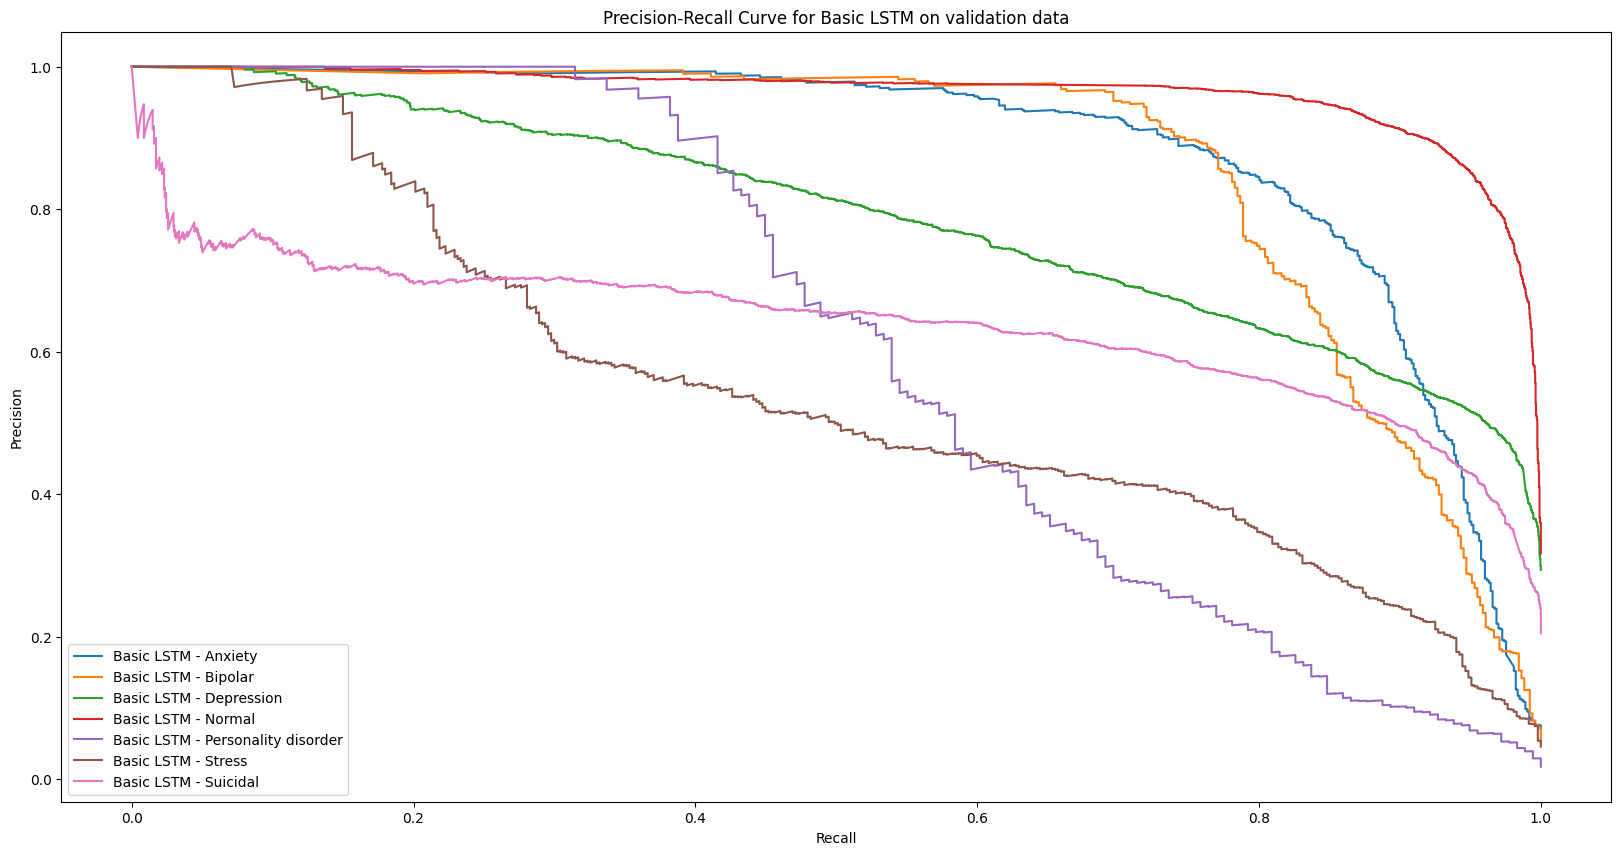

320/320 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


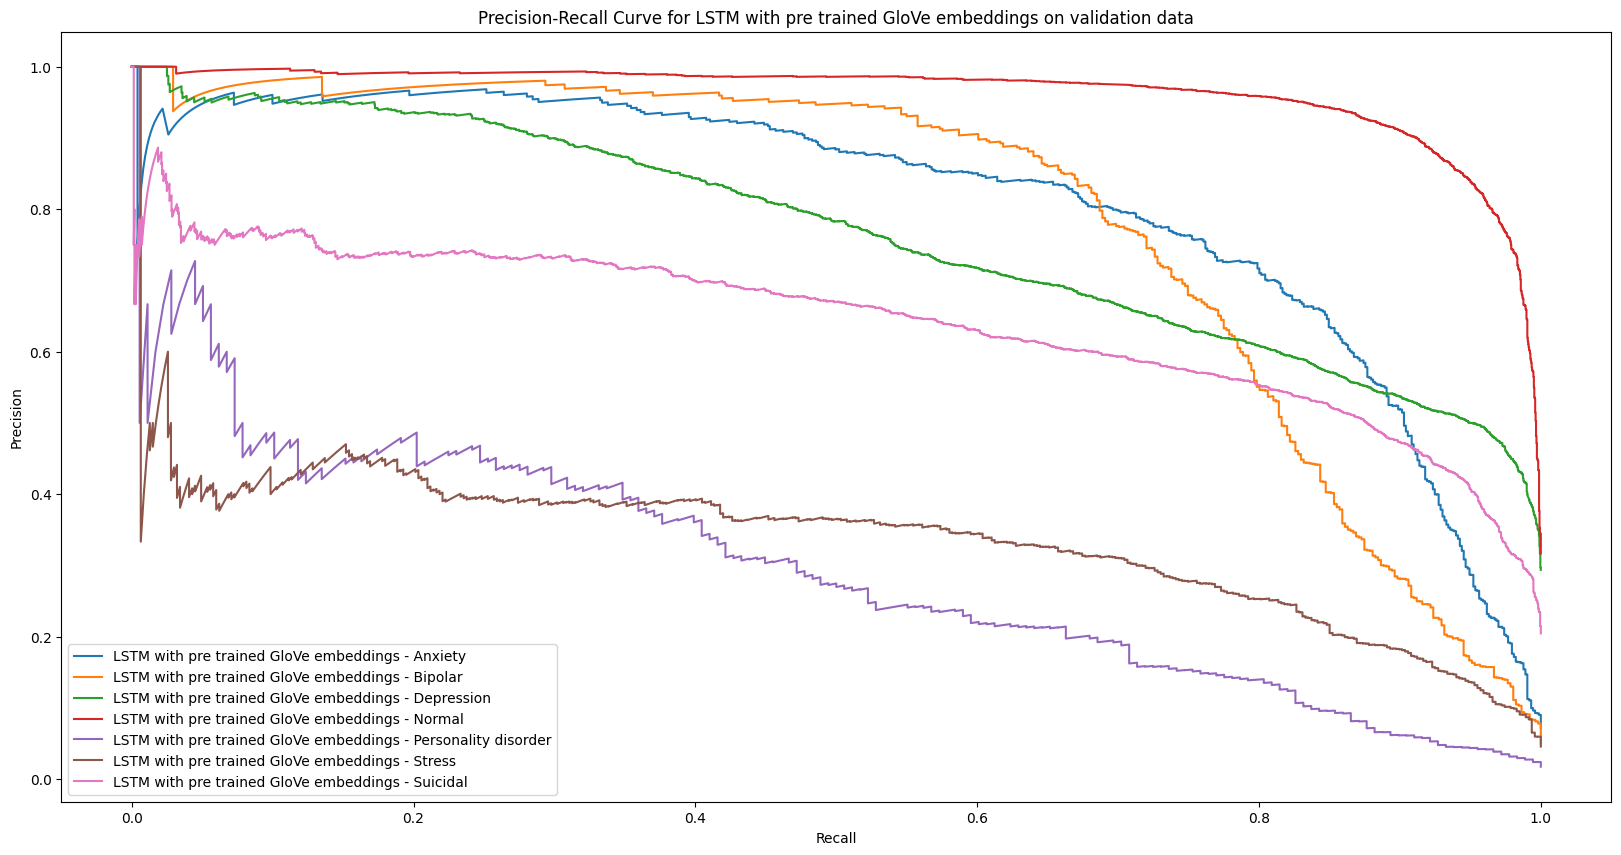

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


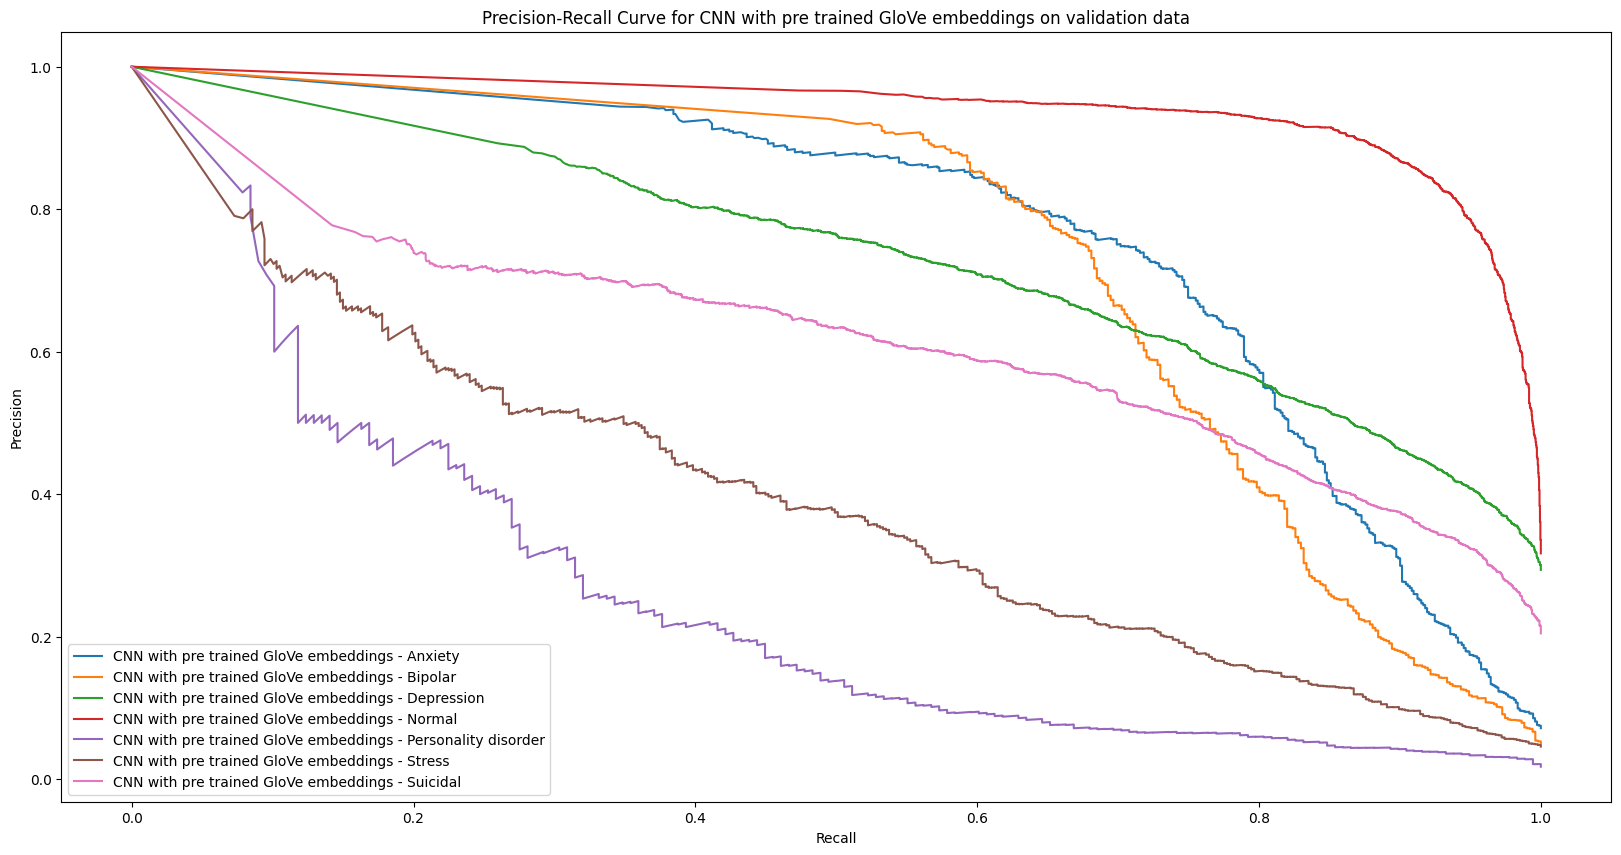

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


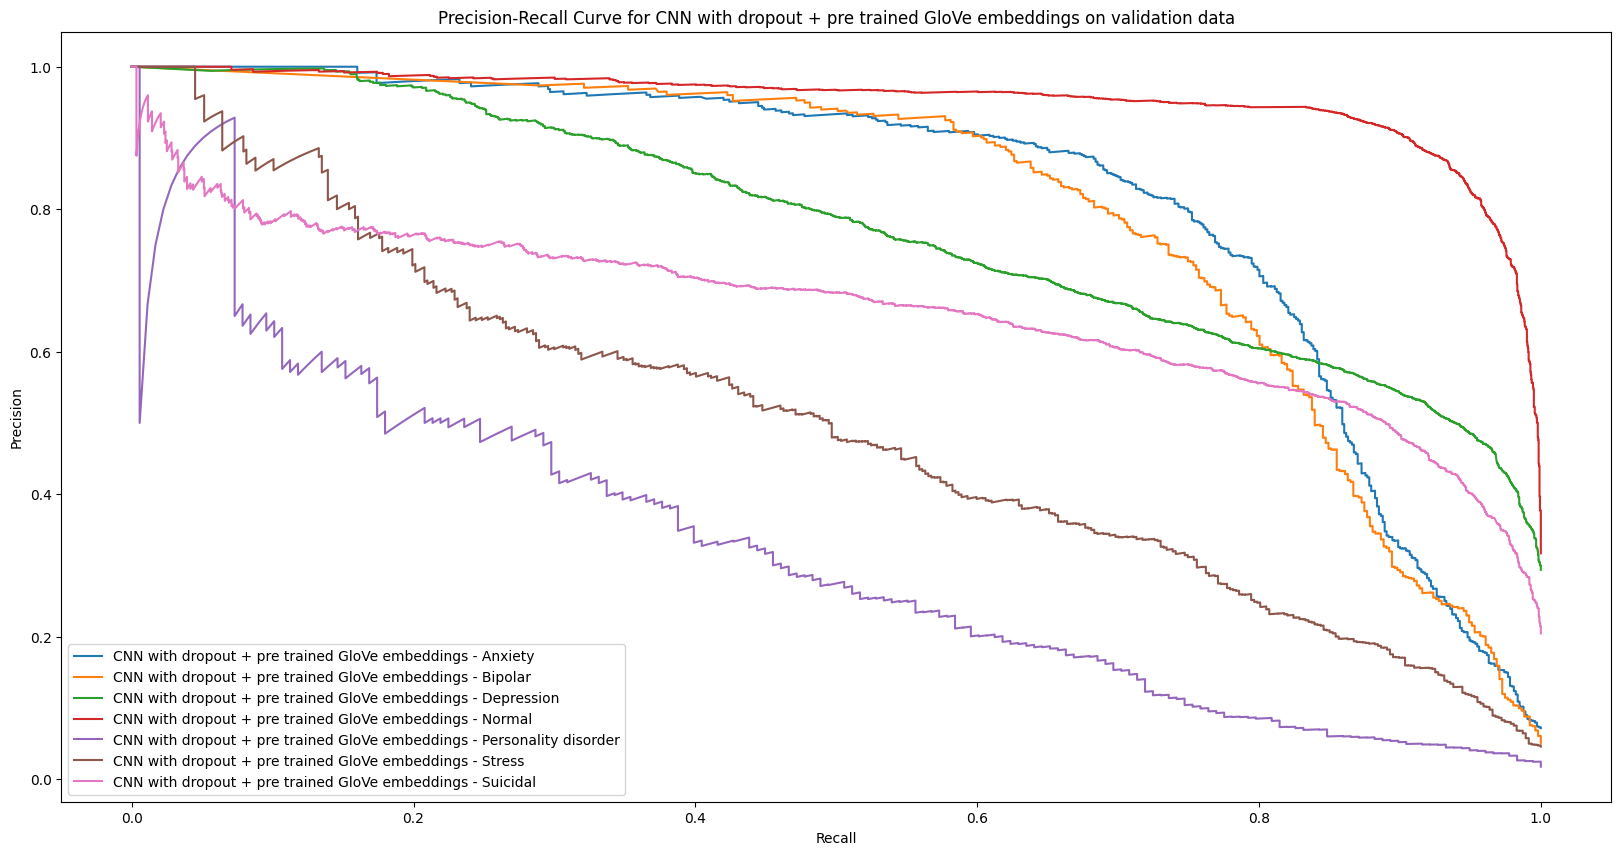

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


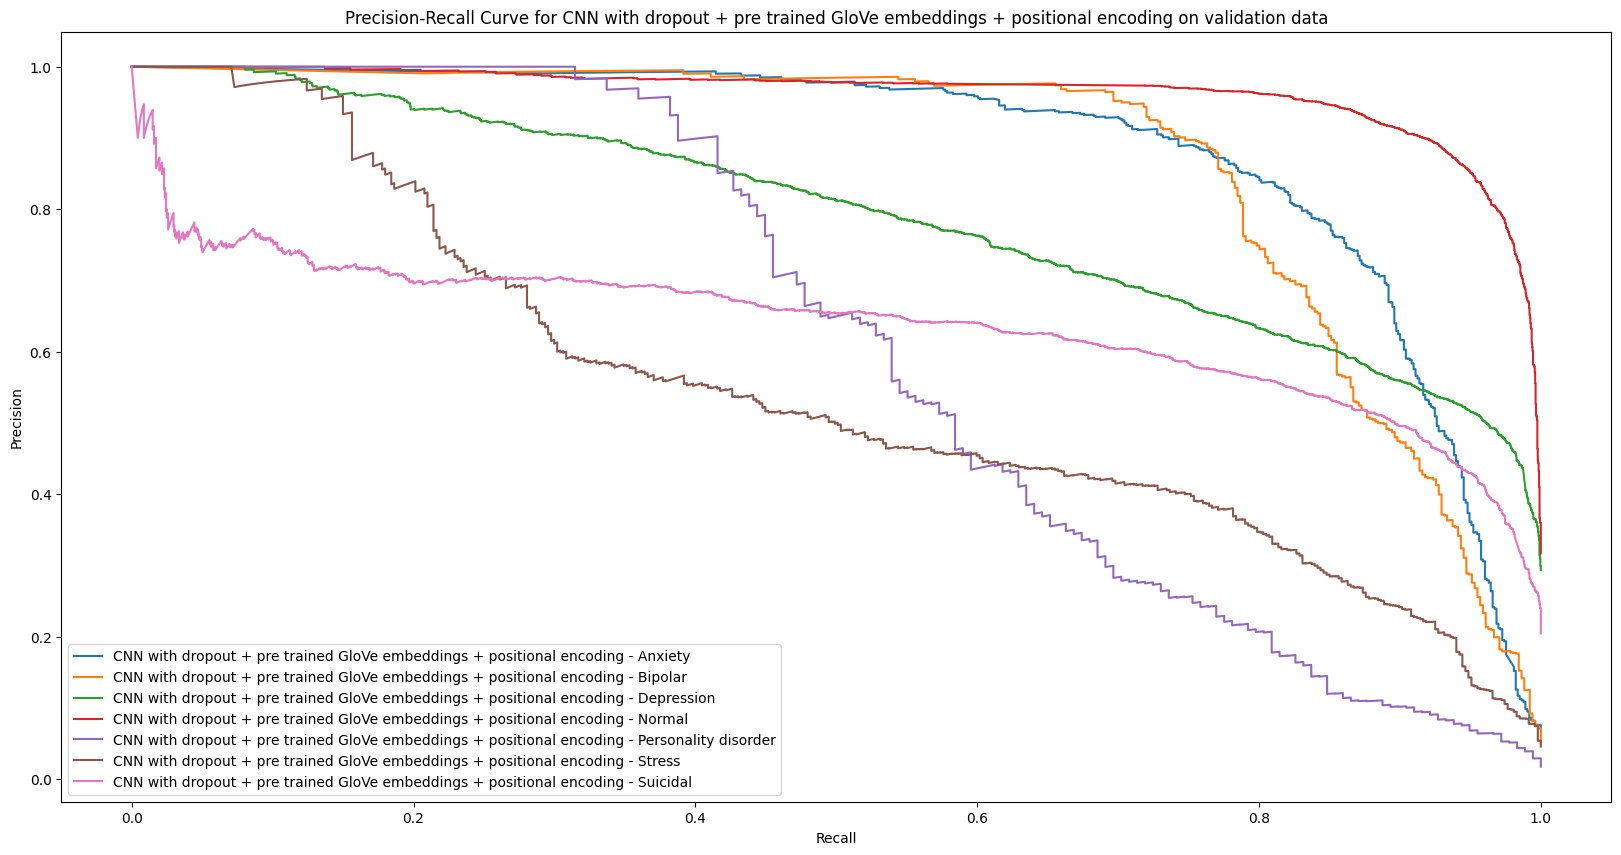

In [ ]:

print("For Validation data")
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


for model_name, y_pred_classes in y_pred_dict.items():
    y_pred = models[model_name].predict(X_test)  # Use predict for probabilities
    plt.figure(figsize=(20, 10))
    for i in range(7):  # Assuming 7 classes
        precision, recall, _ = precision_recall_curve(y_test[:,i], y_pred[:,i])
        plt.plot(recall, precision, label=f"{model_name} - {labels[i]}")


    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {model_name} on validation data")
    plt.legend(loc='lower left')
    plt.savefig(f"{model_name}_precision_recall_test.png")
    plt.show()

For Training data
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


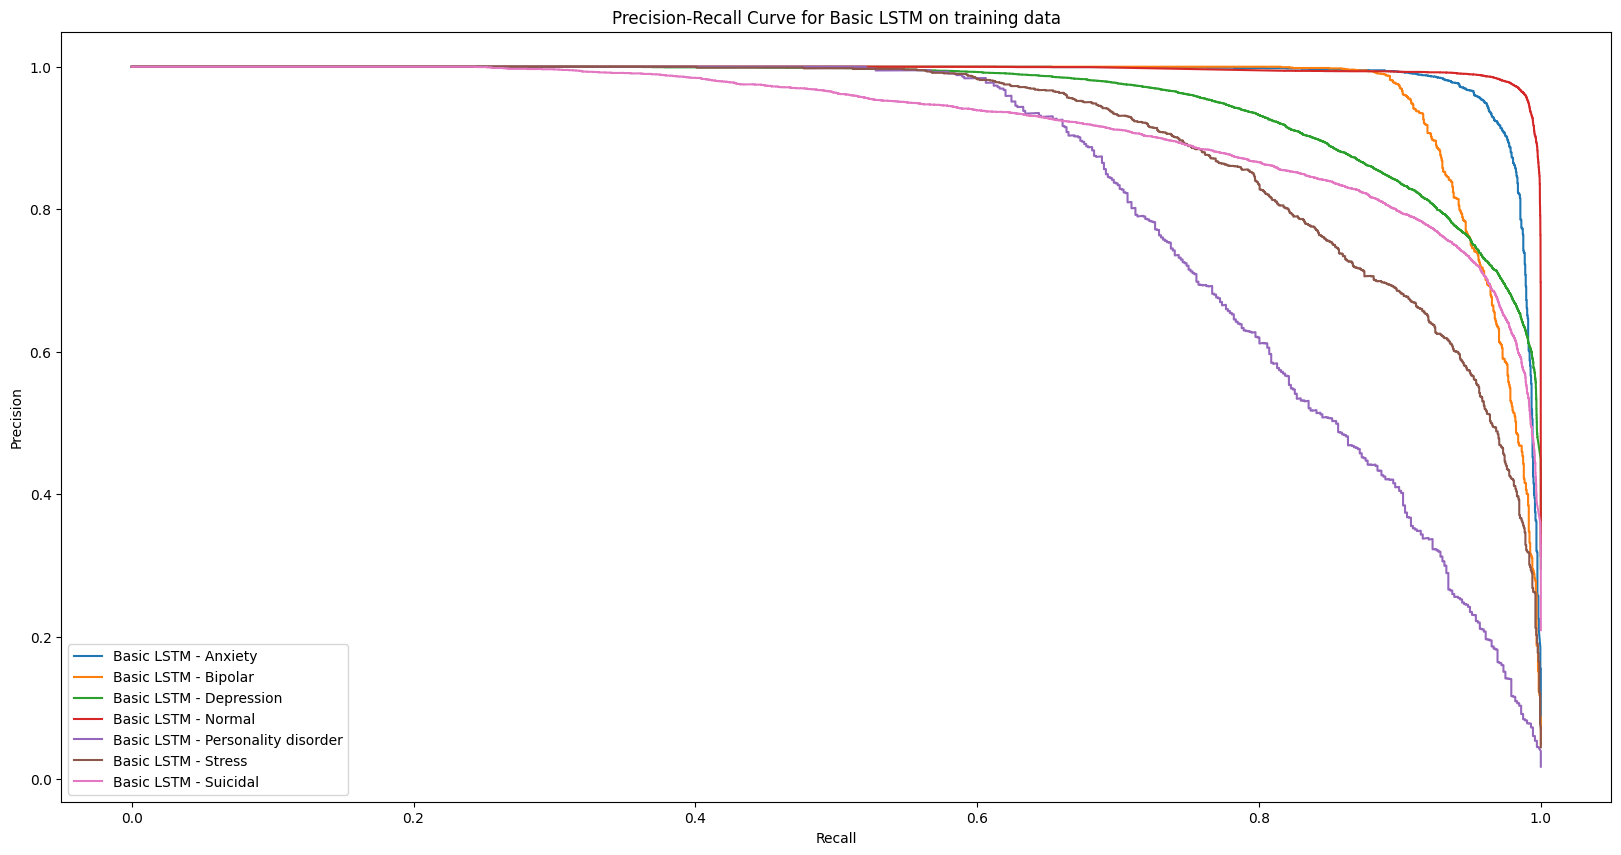

1277/1277 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step


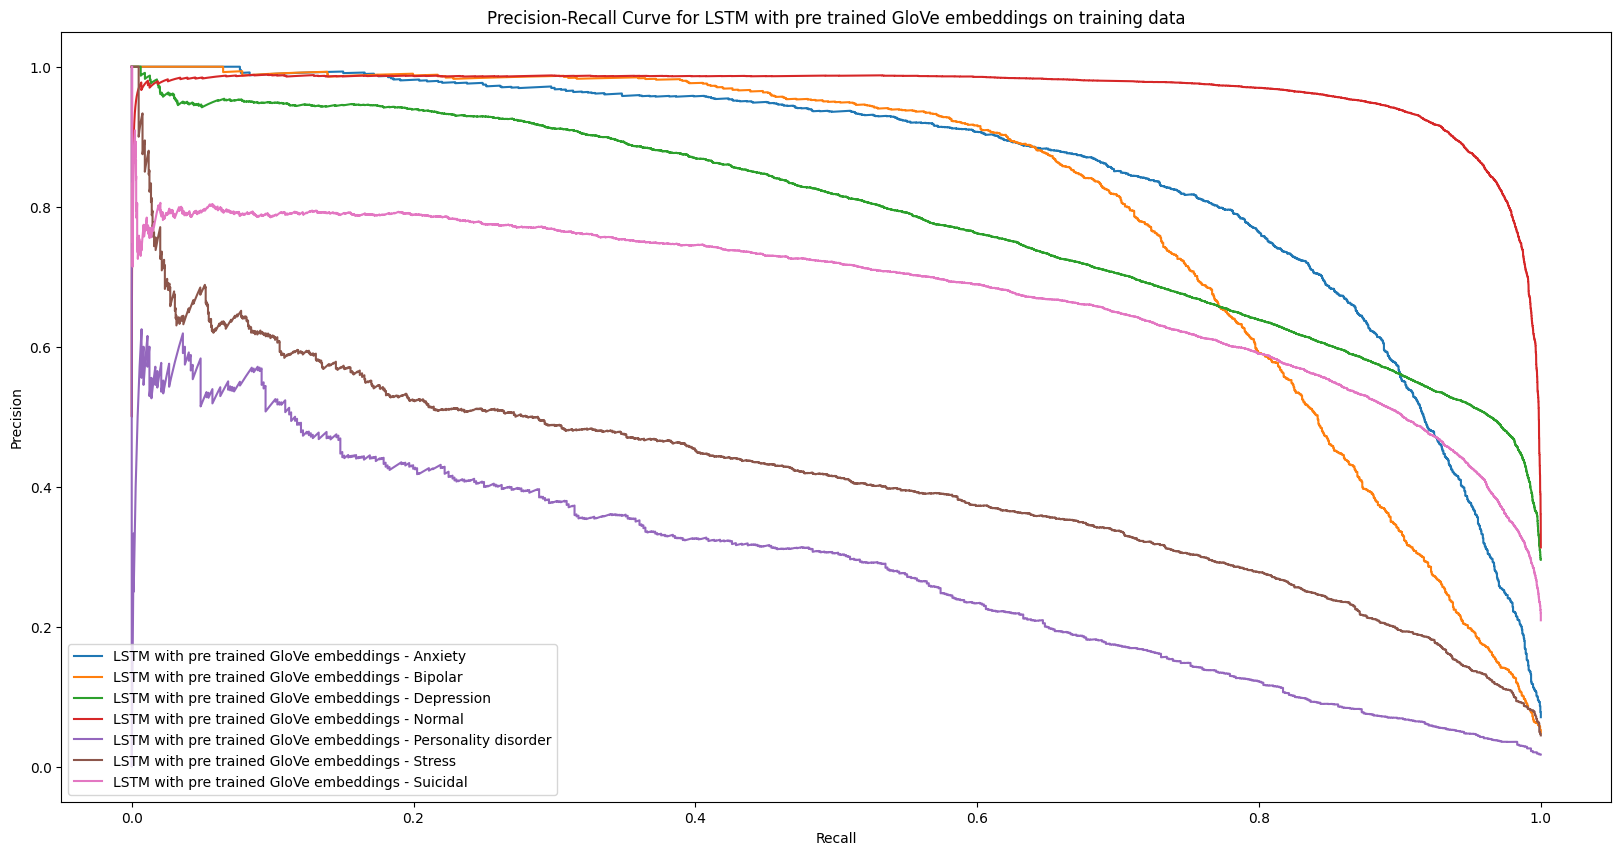

1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


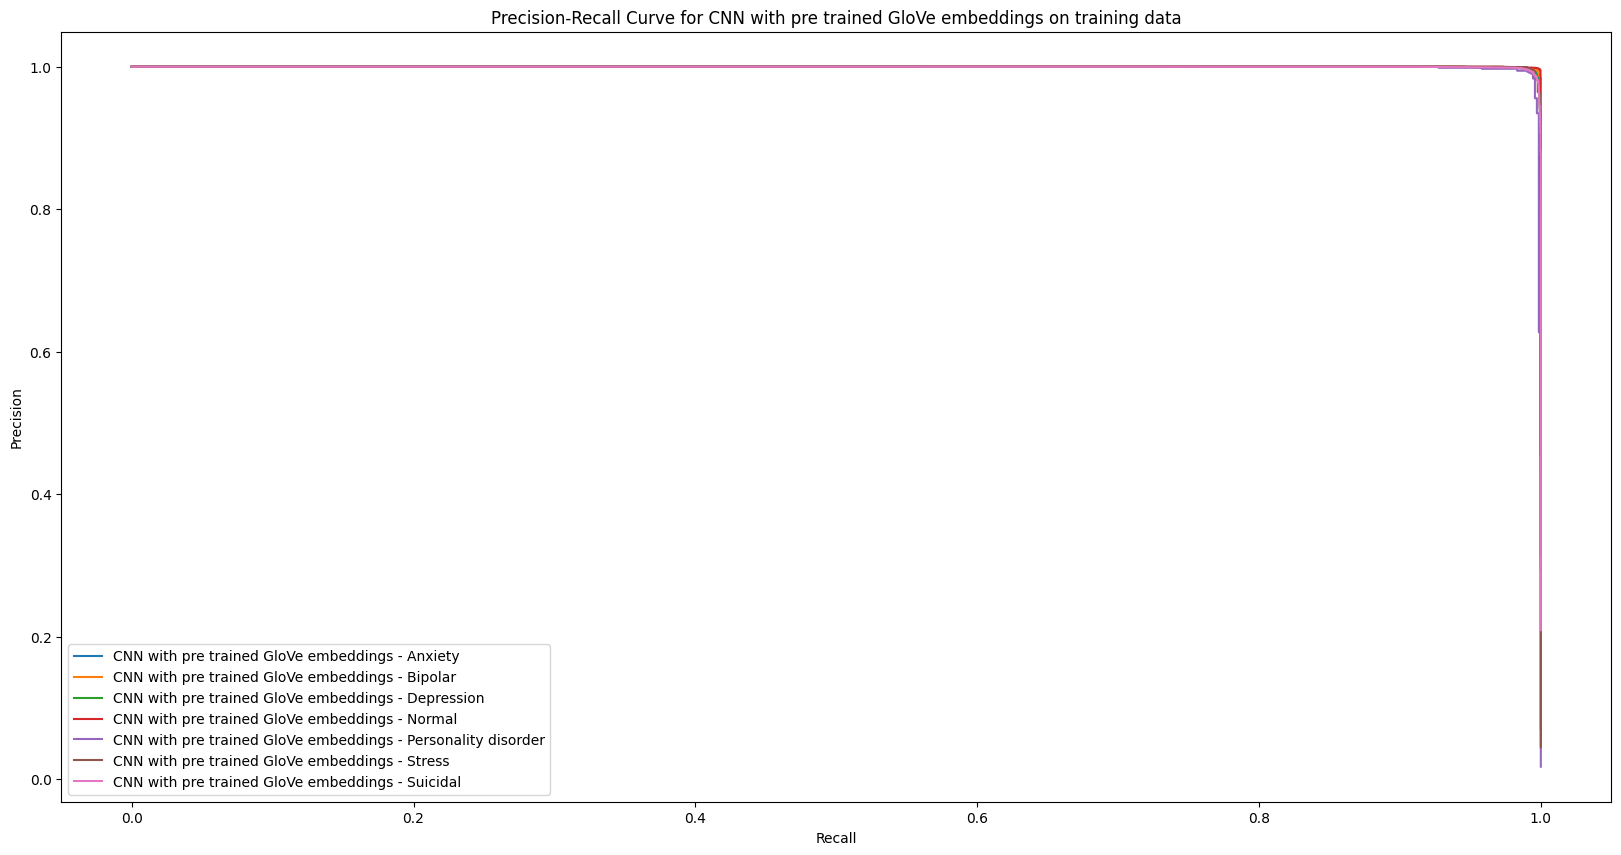

1277/1277 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


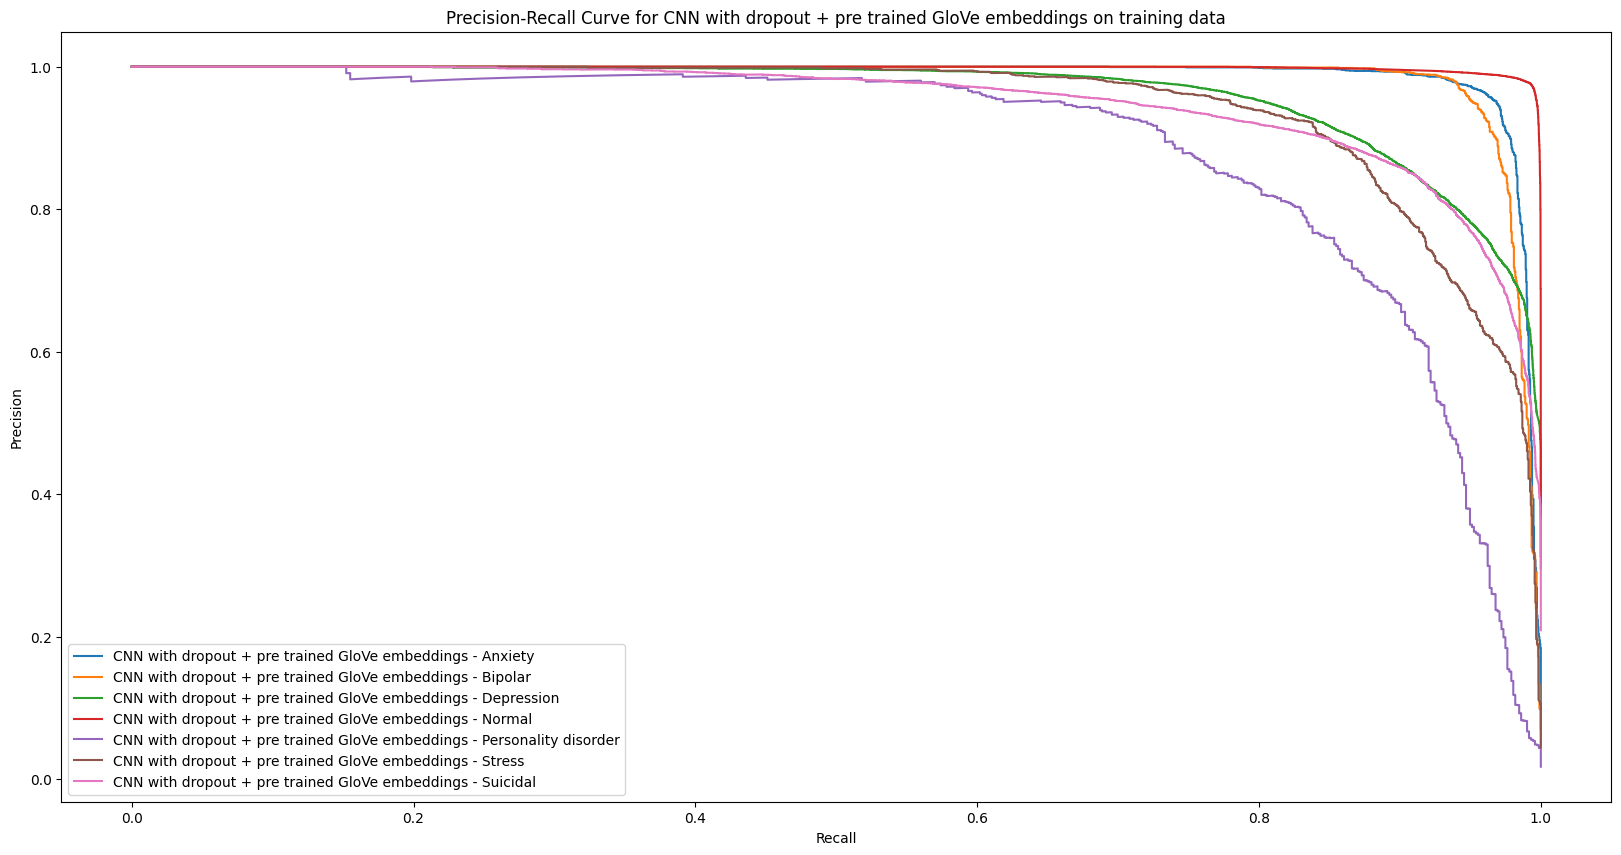

1277/1277 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


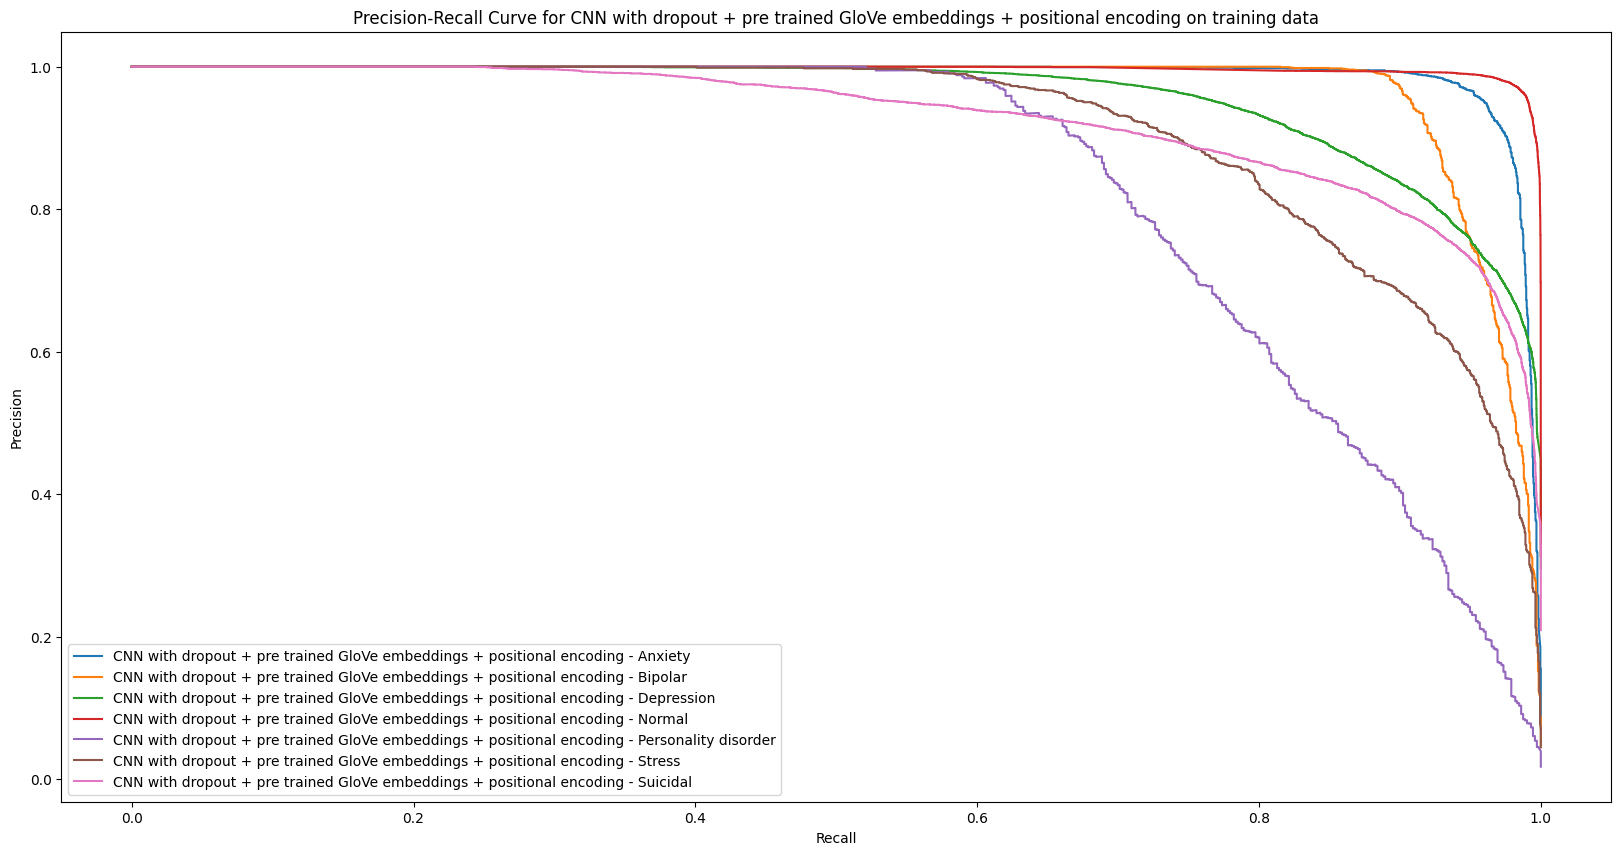

In [ ]:

print("For Training data")
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


for model_name, y_pred_classes in y_pred_dict.items():
    y_pred = models[model_name].predict(X_train)  # Use predict for probabilities
    plt.figure(figsize=(20, 10))
    for i in range(7):  # Assuming 7 classes
        precision, recall, _ = precision_recall_curve(y_train[:,i], y_pred[:,i])
        plt.plot(recall, precision, label=f"{model_name} - {labels[i]}")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {model_name} on training data")
    plt.legend(loc='lower left')
    plt.savefig(f"{model_name}_precision_recall_train.png")
    plt.show()